# Multi Dimensional Linear Regression: HIV Resistance

The data are a collection of 496 proteins, presented as the amino acids at each of 99 locations. 
The response is a measure of the resistance of the protein to the HIV virus. The goal is to build
a linear regression model that is able to predict the HIV resistance. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Content:
    
1. Data Exploration
2. Unregularized Linear Regression
3. Ridge Regression
4. Lasso Regression

## 1) Data Exploration

In [2]:
df = pd.read_csv('datasets/hiv.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.496508,P,Q,I,T,L,W,Q,R,P,...,M,S,Q,L,G,C,T,L,N,F
1,4.812184,P,Q,I,T,L,W,Q,R,P,...,L,T,Q,L,G,C,T,L,N,F
2,3.295837,P,Q,I,T,L,W,Q,R,P,...,L,T,Q,L,G,C,T,L,N,F
3,4.828314,P,Q,I,T,L,W,Q,R,P,...,M,T,Q,I,G,C,T,L,N,F
4,4.867534,P,Q,I,T,L,W,Q,R,P,...,M,T,Q,I,G,C,T,L,N,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,4.836282,P,Q,I,T,L,W,Q,R,P,...,M,T,Q,L,G,C,T,L,N,F
492,4.787492,P,Q,I,T,L,W,Q,R,P,...,L,T,Q,I,G,C,T,L,N,F
493,5.030438,P,Q,I,T,L,W,Q,R,P,...,L,T,Q,L,G,C,T,L,N,F
494,4.700480,P,Q,I,T,L,W,Q,R,P,...,L,T,Q,I,G,C,T,L,N,F


Dimension of data: 496 proteins by 99 positions

Amino acids:
{'T', 'M', 'R', 'K', 'A', 'F', 'V', 'H', 'W', 'D', 'P', 'S', 'G', 'Q', 'C', 'E', 'I', 'N', 'Z', 'L', 'Y'}


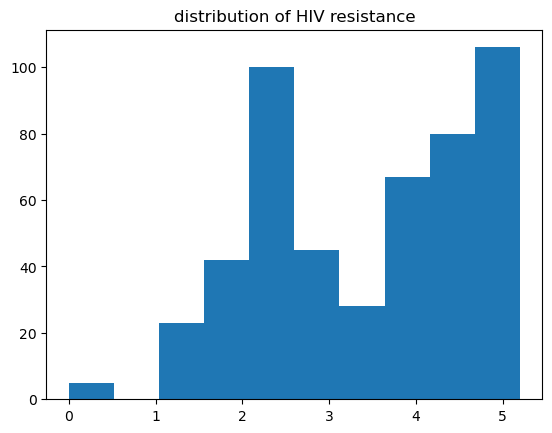

In [3]:
y = np.array(df)[:,0]
x = np.array(df)[:,1:]

print('Dimension of data: %d proteins by %d positions' % (x.shape[0], x.shape[1]))
amino = set(x.flatten())
print('\nAmino acids:')
print(amino)

plt.hist(y)
plt.title('distribution of HIV resistance')
plt.show()

To have a quick overview, we compute the set of amino acids used at each position

In [4]:
[set(x[:,i]) for i in np.arange(x.shape[1])]

[{'P'},
 {'Q', 'V'},
 {'I', 'V'},
 {'A', 'D', 'P', 'S', 'T'},
 {'L'},
 {'W'},
 {'Q'},
 {'Q', 'R'},
 {'P'},
 {'F', 'H', 'I', 'L', 'M', 'R', 'V', 'Y'},
 {'I', 'L', 'V'},
 {'A', 'E', 'I', 'K', 'N', 'P', 'R', 'S', 'T', 'Z'},
 {'I', 'L', 'V'},
 {'K', 'R', 'T', 'Z'},
 {'I', 'L', 'V'},
 {'A', 'E', 'G', 'Z'},
 {'E', 'G'},
 {'H', 'I', 'Q', 'Z'},
 {'I', 'L', 'P', 'Q', 'R', 'T', 'V', 'Z'},
 {'I', 'K', 'M', 'R', 'T', 'V'},
 {'E', 'Q'},
 {'A', 'V'},
 {'I', 'L'},
 {'F', 'I', 'L'},
 {'D'},
 {'T'},
 {'G'},
 {'A'},
 {'D'},
 {'D', 'N'},
 {'T'},
 {'I', 'V'},
 {'F', 'I', 'L', 'M', 'V'},
 {'D', 'E', 'K', 'N', 'Q', 'T', 'Z'},
 {'D', 'E', 'N'},
 {'I', 'L', 'M', 'V'},
 {'A', 'C', 'D', 'E', 'H', 'N', 'S', 'T', 'Y', 'Z'},
 {'L', 'V'},
 {'P', 'Q', 'S'},
 {'G'},
 {'I', 'K', 'P', 'R'},
 {'W'},
 {'K', 'R', 'T'},
 {'P'},
 {'K', 'L', 'N', 'Q', 'R', 'V'},
 {'I', 'L', 'M', 'V'},
 {'I', 'V'},
 {'G', 'M', 'S', 'V'},
 {'G'},
 {'I', 'L', 'V'},
 {'G'},
 {'G'},
 {'F', 'I', 'L'},
 {'A', 'I', 'L', 'M', 'S', 'T', 'V'},
 {'K', '

We see that some columns are constant. As they won't influence in the regression, 
we remove them.

In [5]:
num_acids = np.array([len(set(x[:,i])) for i in np.arange(x.shape[1])])
x = x[:,num_acids > 1]


print('New dimension of data: %d proteins by %d positions' % (x.shape[0], x.shape[1]))

New dimension of data: 496 proteins by 70 positions


Next, we convert to binary matrix, with 1 indicating the amino acid in that position 
is the most common one among all the proteins in the data, and 0 otherwise.

In [6]:
from collections import Counter

n, p = x.shape
X = np.zeros(n*p).reshape(n, p)
for j in np.arange(p):
    acids = Counter(x[:,j])
    letter = acids.most_common(1)[0][0]
    X[:,j] = X[:,j] + (x[:,j] == letter)

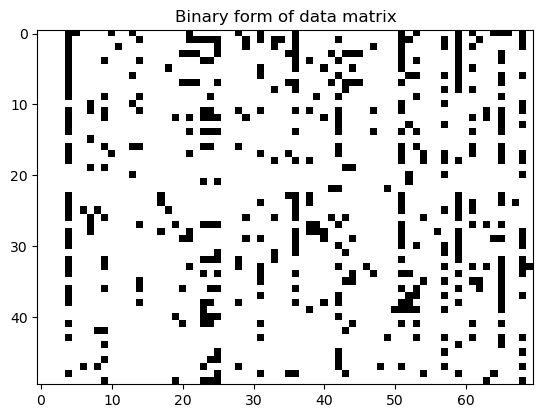

In [7]:
plt.imshow(X[0:50,:], cmap='gray')
_ = plt.title('Binary form of data matrix')

Subtract off the mean of the response, and standarize the columns.

In [8]:
ys = y - np.mean(y)
Xs = (X - np.mean(X, axis=0))/ np.std(X, axis=0)

## 2) Unregularized Regression

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

lin_reg = LinearRegression()
lin_reg.fit(Xs, ys)

LinearRegression()

In [10]:
print("Intercept:", lin_reg.intercept_)
print("Weights:", lin_reg.coef_)

Intercept: -5.3266630633850754e-15
Weights: [ 0.01205378  0.05745748  0.0345648   0.08918524 -0.19405256 -0.05626409
  0.02673208 -0.0314715  -0.00069219 -0.02257085  0.02605083  0.03825843
  0.04871939 -0.00872136 -0.04728087  0.03722864 -0.10205334 -0.0515581
 -0.07155881  0.10630437 -0.00180516  0.03101877 -0.04969048  0.02618378
  0.00159296  0.0867571   0.00557318 -0.01877287  0.08317952  0.06621693
 -0.04809852 -0.29421482 -0.01255688 -0.05748164  0.20206748  0.02285827
 -0.13240217 -0.00155581  0.0339377  -0.02803921  0.02809216 -0.00258074
 -0.07102751  0.10252223  0.00117845 -0.01466962 -0.01373471 -0.00384596
  0.05846571  0.01283093  0.07421267 -0.05043759  0.05386853 -0.09050334
 -0.02007769  0.01517505 -0.05787809 -0.02869741 -0.00199775 -0.27634271
 -0.03630943 -0.15593913  0.01613213 -0.39126837  0.00662696 -0.18823421
  0.11091534  0.02409789 -0.02449906 -0.0624464 ]


In [11]:
y_pred = lin_reg.predict(Xs)

print("MSE:", mean_squared_error(ys, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(ys, y_pred)))
print("MAE:", mean_absolute_error(ys, y_pred))
print("R-squared:", r2_score(ys, y_pred))

MSE: 0.5132857022086044
RMSE: 0.7164396012286063
MAE: 0.5647778036541923
R-squared: 0.6726308854423875


In [12]:
def LOOCV(X_data, y_data, reg):
    m = X_data.shape[0]
    risk = np.zeros(m)
    
    for i in range(m):
        cond = (np.arange(m) != i)
        X_train = X_data[cond, :]
        y_train = y_data[cond]
        X_test = X_data[i, :]
        y_test = y_data[i]
        
        reg_fit = reg.fit(X_train, y_train)
        y_pred = reg_fit.predict(X_test.reshape(1, -1))
        risk[i] = (y_test - y_pred)**2
        
    return np.mean(risk)

In [13]:
print("Estimated (by LOOCV) test MSE for Unregularized Linear Regression:", 
      LOOCV(Xs, ys, LinearRegression()))

Estimated (by LOOCV) test MSE for Unregularized Linear Regression: 0.7552428283167184


## 3) Ridge Regression

### 3.1) Ridge Regularization Paths

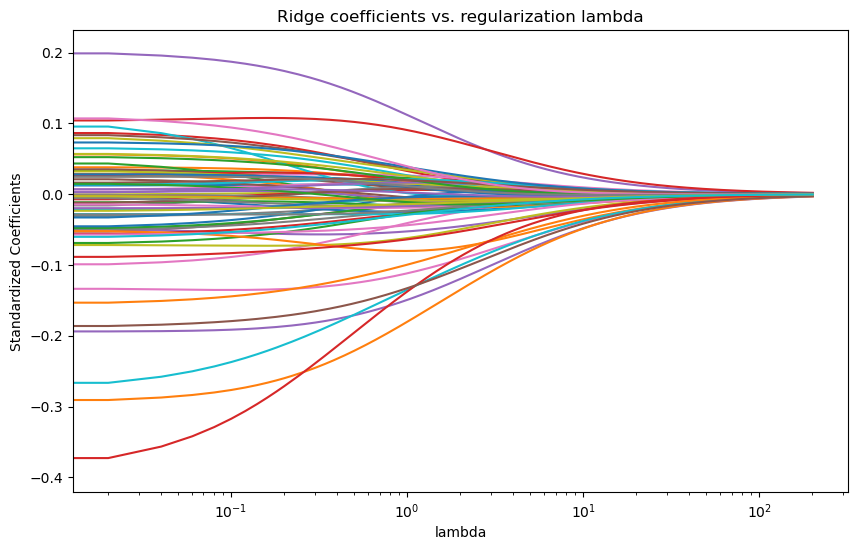

In [14]:
from sklearn.linear_model import Ridge

alphas = np.linspace(0,100000,10000)
coefs = []
ridge = Ridge()


for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(Xs, ys)
    coefs.append(ridge.coef_)

plt.figure(figsize=(10,6))    
ax = plt.gca()
ax.plot(alphas/Xs.shape[0], coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('Standardized Coefficients')
plt.title('Ridge coefficients vs. regularization lambda');
plt.savefig('hiv-ridge-paths.png', bbox_inches='tight')

### 3.2) Optimal Lambda

Optimal lambda: 
 0.028 



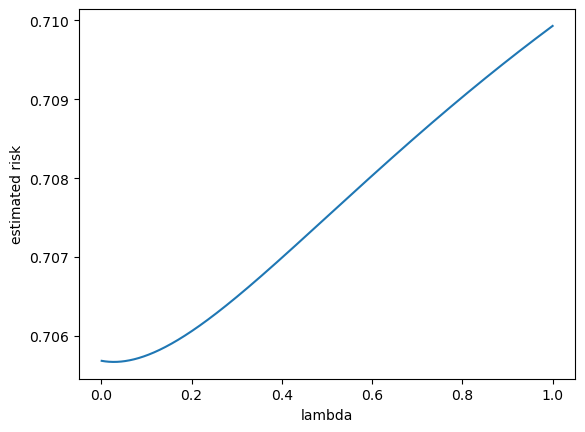

In [15]:
alphas = np.linspace(0.001,1,1000)
ridge = Ridge() 
risk = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(Xs, ys)
    H = Xs @ np.linalg.inv(Xs.T @ Xs + a * np.identity(Xs.shape[1])) @ Xs.T
    yhat = Xs @ ridge.coef_
    # Shortcut Formula
    risk_estimate = np.mean((ys - yhat)**2 / (np.ones(len(Xs)) - np.diag(H))**2)
    risk.append(risk_estimate)

plt.plot(alphas, risk)
plt.xlabel('lambda')
plt.ylabel('estimated risk')

k = np.argmin(risk)
lambda_hat = alphas[k]

print("Optimal lambda: \n", lambda_hat, "\n")

We now use the LOOCV procedure to obtain a better estimate of the test MSE:

In [16]:
risk_estimate = LOOCV(Xs, ys, Ridge(alpha=lambda_hat))
print("Estimated test MSE (by LOOCV) for Ridge Regression: \n", risk_estimate, "\n")

Estimated test MSE (by LOOCV) for Ridge Regression: 
 0.7305893712484093 



## 4) Lasso Regression

### 4.1) Lasso Regularization Paths

In [ ]:
from sklearn.linear_model import Lasso

alphas = np.linspace(0.01,1,10000)
lasso = Lasso() 
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(Xs, ys)
    coefs.append(lasso.coef_)

plt.figure(figsize=(10,6))    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients vs. regularization lambda');
plt.savefig('hiv-lasso-paths.png', bbox_inches='tight')

### 4.2) Optimal Lambda

In [ ]:
alphas = np.linspace(0.001,1,2000)
lasso = Lasso() 
risk = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(Xs, ys)
    lasso.coef_
    S = [j for j in np.arange(p) if np.abs(lasso.coef_)[j] > 0]
    XS = Xs[:,S]
    H = XS @ np.linalg.inv(XS.T @ XS) @ XS.T
    yhat = H @ ys
    risk_estimate = np.mean((ys - yhat)**2)/(1 - len(S) / XS.shape[0])**2
    risk.append(risk_estimate)

plt.plot(alphas, risk)
plt.xlabel('lambda')
plt.ylabel('estimated risk')

k = np.argmin(risk)
lambda_hat = alphas[k]

lasso.set_params(alpha=lambda_hat)
lasso.fit(Xs, ys)
S = [j for j in np.arange(p) if np.abs(lasso.coef_)[j] > 0]
XS = Xs[:,S]
H = XS @ np.linalg.inv(XS.T @ XS) @ XS.T
betahat = np.linalg.inv(XS.T @ XS) @ XS.T @ ys



print("Optimal lambda: \n", lambda_hat, "\n")
print("S estimate: \n", S, "\n")

In [ ]:
risk_estimate = LOOCV(XS, ys, LinearRegression())
print("Estimated test MSE (by LOOCV) for Lasso Regression: \n", risk_estimate, "\n")